<a href="https://colab.research.google.com/github/pieman-Dev-Source/cameraXProject/blob/master/WineQuality!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Первые 5 строк загруженного датасета:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1   

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144 (576.00 B)

 Trainable params: 144 (576.00 B)

 Non-trainable params: 0 (0.00 B)


Начинаем обучение...
Epoch 1/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2973 - loss: 0.9755 - val_accuracy: 0.7656 - val_loss: 0.6312
Epoch 2/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7809 - loss: 0.5934 - val_accuracy: 0.8750 - val_loss: 0.4240
Epoch 3/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8253 - loss: 0.4544 - val_accuracy: 0.8945 - val_loss: 0.3304
Epoch 4/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8657 - loss: 0.3569 - val_accuracy: 0.8984 - val_loss: 0.2874
Epoch 5/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8619 - loss: 0.3280 - val_accuracy: 0.9023 - val_loss: 0.2669
Epoch 6/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8737 - loss: 0.2985 - val_accuracy: 0.8906 - val_loss: 0.2558
Epoch 7/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8628 - loss: 0.3107 - val_accuracy: 0.8867 - val_loss: 0.2479
Epoch 8/200
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8801 - l

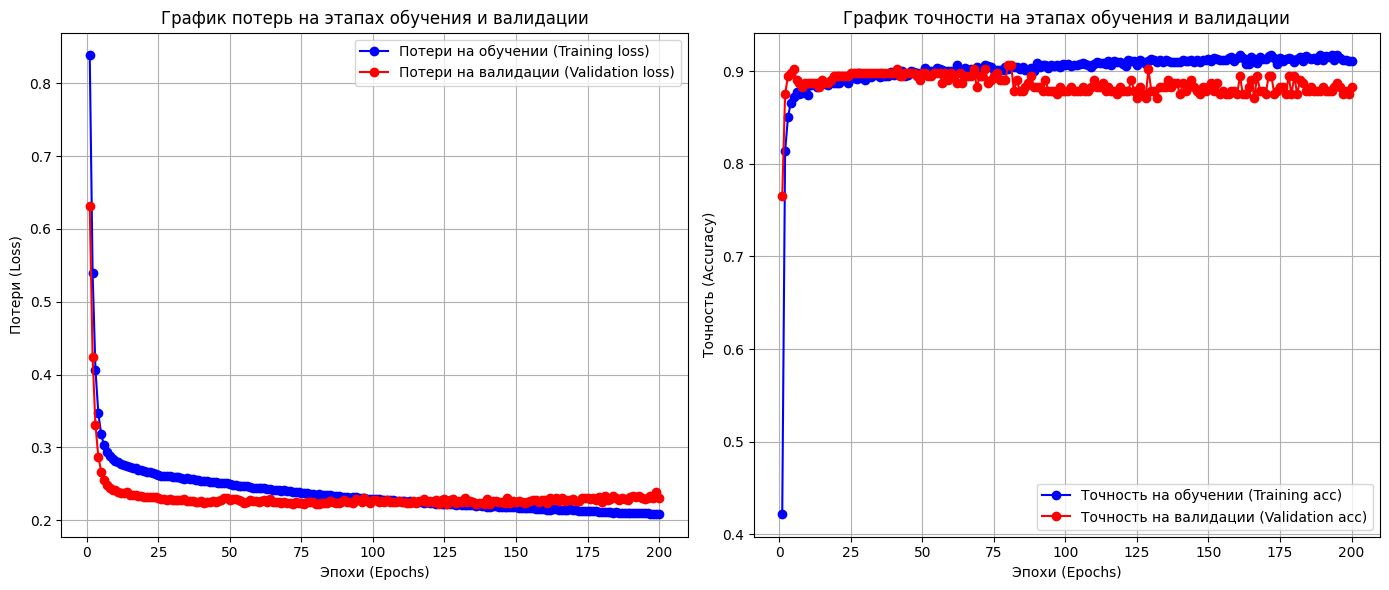

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step

Примеры предсказаний (вероятность класса 1):
Реальность: 0, Вероятность 'хорошего': 0.0113 -> Предсказание: 0
Реальность: 0, Вероятность 'хорошего': 0.0002 -> Предсказание: 0
Реальность: 0, Вероятность 'хорошего': 0.0354 -> Предсказание: 0
Реальность: 0, Вероятность 'хорошего': 0.0346 -> Предсказание: 0
Реальность: 0, Вероятность 'хорошего': 0.0557 -> Предсказание: 0


In [26]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # <-- ИМПОРТИРУЕМ БИБЛИОТЕКУ ДЛЯ ГРАФИКОВ

# --- 1. Загрузка и подготовка данных ---

try:
    # Используем разделитель по умолчанию - запятую
    df = pd.read_csv('winequality-red.csv')
except FileNotFoundError:
    print("Файл 'winequality-red.csv' не найден. Пожалуйста, проверьте имя файла и путь.")
    exit()

# Проверяем, что данные загрузились корректно
print("Первые 5 строк загруженного датасета:")
print(df.head())
print(f"\nРазмер датасета: {df.shape}")

if df.shape[1] < 2:
    print("\nОШИБКА: Данные не разделены на столбцы. Проверьте разделитель в CSV-файле.")
    exit()

# --- Превращаем задачу в бинарную классификацию ---
df['is_good_wine'] = (df['quality'] > 6.5).astype(int)

print("\nРаспределение классов (0 - обычное, 1 - хорошее):")
print(df['is_good_wine'].value_counts())

X = df.drop(['quality', 'is_good_wine'], axis=1)
y = df['is_good_wine']

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_params_count = X_train_scaled.shape[1]

# --- 2. Создание простой нейронной сети Keras ---

model = keras.Sequential([
    layers.Dense(input_params_count, activation='relu', input_shape=(input_params_count,)),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

# --- 3. Компиляция и обучение ---

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nНачинаем обучение...")
# Сохраняем историю обучения в переменную `history`
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=5,
    validation_split=0.2, # Используем 20% обучающих данных для валидации
    verbose=1
)

# --- 4. Оценка модели ---

print("\nОценка на тестовых данных:")
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"Точность (Accuracy) на тесте: {test_acc:.4f}")



# Получаем данные из истории обучения
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Создаем фигуру с двумя графиками
plt.figure(figsize=(14, 6))

# --- График 1: Потери (Loss) ---
plt.subplot(1, 2, 1) # 1 строка, 2 столбца, 1-й график
plt.plot(epochs, loss, 'bo-', label='Потери на обучении (Training loss)')
plt.plot(epochs, val_loss, 'ro-', label='Потери на валидации (Validation loss)')
plt.title('График потерь на этапах обучения и валидации')
plt.xlabel('Эпохи (Epochs)')
plt.ylabel('Потери (Loss)')
plt.legend()
plt.grid(True)

# --- График 2: Точность (Accuracy) ---
plt.subplot(1, 2, 2) # 1 строка, 2 столбца, 2-й график
plt.plot(epochs, acc, 'bo-', label='Точность на обучении (Training acc)')
plt.plot(epochs, val_acc, 'ro-', label='Точность на валидации (Validation acc)')
plt.title('График точности на этапах обучения и валидации')
plt.xlabel('Эпохи (Epochs)')
plt.ylabel('Точность (Accuracy)')
plt.legend()
plt.grid(True)

plt.tight_layout() # Автоматически подбирает расположение графиков
plt.show() # Показываем окно с графиками

# --- 5. Пример предсказания (оставлен из предыдущей версии) ---
predictions_proba = model.predict(X_test_scaled[:5])
print("\nПримеры предсказаний (вероятность класса 1):")
for i, prob in enumerate(predictions_proba):
    actual = y_test.iloc[i]
    predicted_class = 1 if prob > 0.5 else 0
    print(f"Реальность: {actual}, Вероятность 'хорошего': {prob[0]:.4f} -> Предсказание: {predicted_class}")